In [1]:
import pandas

import utils

df = pandas.read_csv('../data/survey2024_headerscleaned.csv')

In [2]:
short_colnames = {'in-person workshops on how to teach bioimage analysis workflows':'in-person\nteaching\nworkshops',
                  'in-person workshop on new bioimage analysis software tools':'in-person\nsoftware\nworkshops',
                  'online events discussing image data infrastructure and image data management':'online\ndata\nmanagement',
                  'sessions presenting open bioimage analysis questions, annotated data sets, and an overview explanation of the biology of the data':'seminars\non data and\n questions',
                  'provide basic knowledge and vocabulary of new developments in bioimage analysis for better communication between computer scientists, life scientists, imaging specialists and software developers':'introductory\nmaterials',
                  'open discussion forum and interaction platform':'open\nforum',
                  'publishing and curating training materials':'publishing\ntraining\nmaterials',}
long_colnames = {f'Q10 What type of activity would you want GloBIAS to offer in the first twelve months after its foundation [{k}]':v for k,v in short_colnames.items()}

utils.normalized_percent_graphs(df,long_colnames,'../figures/WhatShouldWeDo.png',prints=True,xlabel = 'Interest')

Original shape: (291, 54)
Shape after filtering: (289, 54)
(275, 54) Q10 What type of activity would you want GloBIAS to offer in the first twelve months after its foundation [in-person workshops on how to teach bioimage analysis workflows]
maybe interested                   121
definitely would want to attend    111
not at all interested               43
Name: count, dtype: int64
(281, 54) Q10 What type of activity would you want GloBIAS to offer in the first twelve months after its foundation [in-person workshop on new bioimage analysis software tools]
definitely would want to attend    135
maybe interested                   126
not at all interested               20
Name: count, dtype: int64
(283, 54) Q10 What type of activity would you want GloBIAS to offer in the first twelve months after its foundation [online events discussing image data infrastructure and image data management]
definitely would want to attend    133
maybe interested                   126
not at all interested  

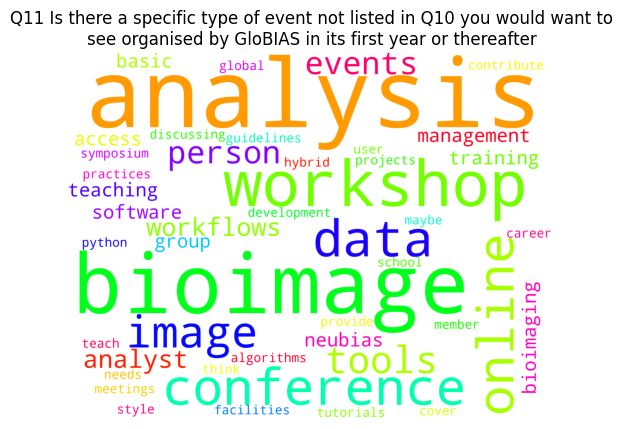

In [3]:
col_name = 'Q11 Is there a specific type of event not listed in Q10 you would want to see organised by GloBIAS in its first year or thereafter'
utils.wordcloud_func(col_name,[],'../figures/WhatShouldWeDoNotListed.png',df,colormap='hsv',width=2400,height=1800,max_words=50)